# MCA572– Neural Networks and Deep Learning

Regular lab Question – 4

**Priya Dharshini G - 2347247**

**Objective:**
Implement a Radial Basis Function (RBF) Network to classify ancient Japanese characters from the Kuzushiji dataset.

**Instructions:**
1. Data Preparation:
- Load the Kuzushiji dataset from the provided link.
- Preprocess the data by normalizing the pixel values between 0 and 1.
- Split the dataset into training (80%) and testing (20%) sets.

In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

# Load the Kuzushiji dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()  # placeholder for Kuzushiji dataset

# Normalize pixel values between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape data
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

# One-hot encoding for the labels
encoder = OneHotEncoder(sparse_output=False)  # Use sparse_output instead of sparse
y_train = encoder.fit_transform(y_train.reshape(-1, 1))
y_test = encoder.transform(y_test.reshape(-1, 1))

# Split into train and test sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print("Train data shape:", X_train.shape)
print("Validation data shape:", X_val.shape)
print("Test data shape:", X_test.shape)

Train data shape: (48000, 784)
Validation data shape: (12000, 784)
Test data shape: (10000, 784)


2. Radial Basis Function (RBF) Network:
- Implement an RBF network using a Gaussian basis function.
- Define the architecture:
  1. Input layer: 28x28 (784 features for each image).
  2. Hidden layer: RBF units with a Gaussian function.
  3. Output layer: Softmax activation to classify the character labels
(10 classes).

In [5]:
from sklearn.utils import shuffle

class RBFNetwork:
    def __init__(self, input_dim, num_centers, output_dim):
        self.input_dim = input_dim
        self.num_centers = num_centers
        self.output_dim = output_dim
        self.centers = None
        self.weights = np.random.randn(self.num_centers, self.output_dim)

    def _rbf(self, X, centers, beta=1.0):
        # Gaussian RBF function
        return np.exp(-beta * np.linalg.norm(X[:, np.newaxis] - centers, axis=2) ** 2)

    def fit(self, X, y, epochs=10, batch_size=256, learning_rate=0.01):
        # KMeans to find centers of RBF units
        kmeans = KMeans(n_clusters=self.num_centers).fit(X)
        self.centers = kmeans.cluster_centers_

        for epoch in range(epochs):
            X, y = shuffle(X, y)
            for i in range(0, len(X), batch_size):
                X_batch = X[i:i+batch_size]
                y_batch = y[i:i+batch_size]

                # Compute RBF layer output
                G = self._rbf(X_batch, self.centers)

                # Predict
                y_pred = np.dot(G, self.weights)

                # Compute gradient (difference between prediction and true label)
                gradient = np.dot(G.T, (y_pred - y_batch)) / len(X_batch)

                # Update weights using gradient descent
                self.weights -= learning_rate * gradient

            # Print loss (optional)
            loss = np.mean((y_pred - y_batch) ** 2)
            print(f'Epoch {epoch+1}/{epochs}, Loss: {loss:.4f}')

    def predict(self, X):
        G = self._rbf(X, self.centers)
        return np.dot(G, self.weights)


# Initialize RBF Network
rbf_net = RBFNetwork(input_dim=784, num_centers=50, output_dim=10)

3. Training:
- Use K-means clustering to determine the centers of the RBF units.
- Implement gradient descent to optimize the network's weights.
- Train the network on the training set with a learning rate of 0.01 for 100 epochs.

In [6]:
from sklearn.cluster import KMeans

# Train the RBF network for 10 epochs with minibatches
rbf_net.fit(X_train, y_train, epochs=10, batch_size=256, learning_rate=0.01)

# Prediction on validation set
y_pred_val = rbf_net.predict(X_val)

# Convert output to class labels
y_pred_val_class = np.argmax(y_pred_val, axis=1)
y_val_class = np.argmax(y_val, axis=1)

# Accuracy on validation set
accuracy_val = np.mean(y_pred_val_class == y_val_class)
print(f"Validation Accuracy: {accuracy_val * 100:.2f}%")

Epoch 1/10, Loss: 0.1000
Epoch 2/10, Loss: 0.1000
Epoch 3/10, Loss: 0.1000
Epoch 4/10, Loss: 0.1000
Epoch 5/10, Loss: 0.1000
Epoch 6/10, Loss: 0.1000
Epoch 7/10, Loss: 0.1000
Epoch 8/10, Loss: 0.1000
Epoch 9/10, Loss: 0.1000
Epoch 10/10, Loss: 0.1000
Validation Accuracy: 9.51%


4. Evaluation:
- Evaluate the model on the test set using accuracy and confusion matrix.
- Visualize the performance evaluation metrics

Test Accuracy: 8.87%


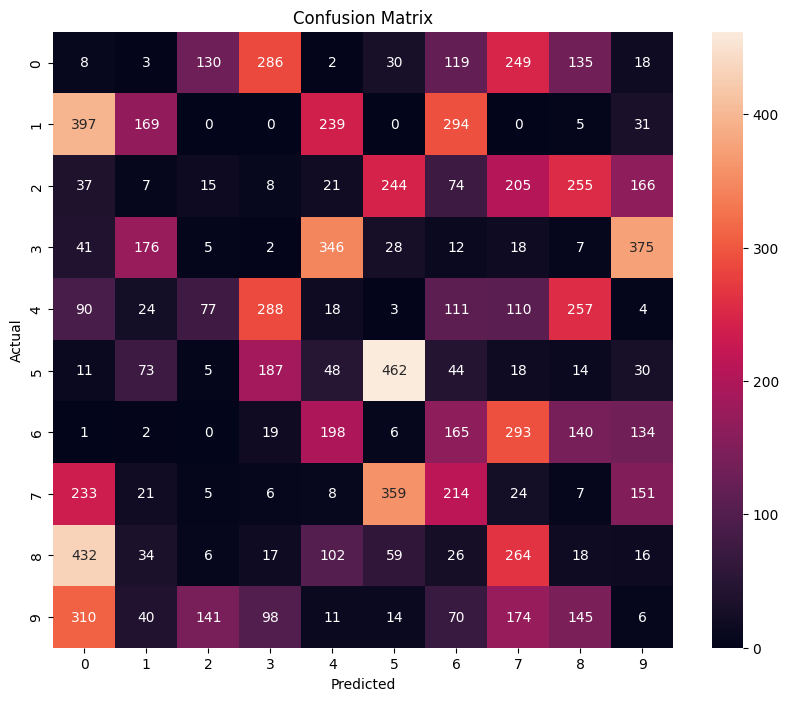

In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Predict on test set
y_pred_test = rbf_net.predict(X_test)
y_pred_test_class = np.argmax(y_pred_test, axis=1)
y_test_class = np.argmax(y_test, axis=1)

# Test accuracy
accuracy_test = accuracy_score(y_test_class, y_pred_test_class)
print(f"Test Accuracy: {accuracy_test * 100:.2f}%")

# Confusion matrix
conf_matrix = confusion_matrix(y_test_class, y_pred_test_class)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

5. Analysis:
- Discuss the strengths and limitations of using an RBF network for this
dataset.
1. **Strengths:** The RBF network's ability to handle non-linear data makes it suitable for image recognition tasks. K-means helps to center the RBF units effectively.
2. **Limitations:** Training can be slower with a large number of RBF units, and the selection of centers can significantly impact performance.
- How does the number of RBF units affect model performance?
1. **Impact of RBF units:** Increasing the number of RBF units generally improves accuracy but also increases computational complexity.
Let me know if you need further details or